In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

GenFR2021 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Generation_FR_20210101-20211231.csv")

GenFR2021 = GenFR2021.replace('n/e', np.NaN)
GenFR2021 = GenFR2021.replace('N/A', np.NaN)

GenFR2021 = pd.DataFrame({'Date': GenFR2021.iloc[:,1],
                          'Nuclear [MWh]': GenFR2021.iloc[:,16]})
GenFR2021.iloc[71,1] = np.nanmean(GenFR2021.iloc[70:73,1])

print(GenFR2021.to_string())

                                                Date  Nuclear [MWh]
0     01.01.2021 00:00 - 01.01.2021 01:00 (CET/CEST)        50378.0
1     01.01.2021 01:00 - 01.01.2021 02:00 (CET/CEST)        49465.0
2     01.01.2021 02:00 - 01.01.2021 03:00 (CET/CEST)        48294.0
3     01.01.2021 03:00 - 01.01.2021 04:00 (CET/CEST)        48380.0
4     01.01.2021 04:00 - 01.01.2021 05:00 (CET/CEST)        48560.0
5     01.01.2021 05:00 - 01.01.2021 06:00 (CET/CEST)        48534.0
6     01.01.2021 06:00 - 01.01.2021 07:00 (CET/CEST)        48558.0
7     01.01.2021 07:00 - 01.01.2021 08:00 (CET/CEST)        48677.0
8     01.01.2021 08:00 - 01.01.2021 09:00 (CET/CEST)        49538.0
9     01.01.2021 09:00 - 01.01.2021 10:00 (CET/CEST)        50023.0
10    01.01.2021 10:00 - 01.01.2021 11:00 (CET/CEST)        50316.0
11    01.01.2021 11:00 - 01.01.2021 12:00 (CET/CEST)        50616.0
12    01.01.2021 12:00 - 01.01.2021 13:00 (CET/CEST)        50295.0
13    01.01.2021 13:00 - 01.01.2021 14:00 (CET/C

In [42]:
import statistics
from itertools import islice
import numpy as np

def function():
    result = []
    for i in range(0, len(GenFR2021.iloc[:,0])):
        if i < 86:
            start = 24*i
            end = 24*(i+1)
            day = GenFR2021.iloc[start,0]
            opNu = statistics.mean(GenFR2021.iloc[start:end,1])
            result.append({"Day": day, "Nuclear [MWh]": opNu})
        elif i == 86: # For some reason this day does not show in the DataFrame
            start = 24*i
            skip = 2066
            end = 2088
            a = sum(GenFR2021.iloc[start:skip,1])
            b = sum(GenFR2021.iloc[skip+1:end,1])
            day = GenFR2021.iloc[start,0]
            opNu = (a+b)/(len(GenFR2021.iloc[start:end,1])-1)
            result.append({"Day": day, "Nuclear [MWh]": opNu})
        elif 87 <= i < 303:
            start = 24*i
            end = 24*(i+1)
            day = GenFR2021.iloc[start,0]
            opNu = statistics.mean(GenFR2021.iloc[start:end,1])
            result.append({"Day": day, "Nuclear [MWh]": opNu})
        elif i == 303:
            start = 24*i
            skip = 7274
            end = 7297
            a = sum(GenFR2021.iloc[start:skip,1])
            b = sum(GenFR2021.iloc[skip+2:end,1])
            day = GenFR2021.iloc[start,0]
            opNu = (a+b)/(len(GenFR2021.iloc[start:end,1])-1)
            result.append({"Day": day, "Nuclear [MWh]": opNu})
        elif 304 <= i < 365:
            start = 24*i+1
            end = 24*(i+1)+1
            day = GenFR2021.iloc[start,0]
            opNu = statistics.mean(GenFR2021.iloc[start:end,1])
            result.append({"Day": day, "Nuclear [MWh]": opNu})
    df = pd.DataFrame(result, columns=['Day','Nuclear [MWh]'])
    return df

FRGen2021 = function().round(2)
FRGen2021["Day"] = pd.date_range(start="1/1/2021", periods=365, freq="D")
print(FRGen2021.to_string())

           Day  Nuclear [MWh]
0   2021-01-01       49982.00
1   2021-01-02       50810.42
2   2021-01-03       50558.23
3   2021-01-04       51200.62
4   2021-01-05       51169.92
5   2021-01-06       51521.50
6   2021-01-07       51705.58
7   2021-01-08       51684.88
8   2021-01-09       51572.12
9   2021-01-10       51542.17
10  2021-01-11       51711.42
11  2021-01-12       50910.54
12  2021-01-13       49927.17
13  2021-01-14       50796.08
14  2021-01-15       51107.00
15  2021-01-16       49455.25
16  2021-01-17       49760.83
17  2021-01-18       50198.62
18  2021-01-19       48010.75
19  2021-01-20       48467.12
20  2021-01-21       47212.29
21  2021-01-22       48338.12
22  2021-01-23       49686.25
23  2021-01-24       50625.38
24  2021-01-25       49448.96
25  2021-01-26       49421.04
26  2021-01-27       49956.29
27  2021-01-28       48334.58
28  2021-01-29       46281.12
29  2021-01-30       45512.75
30  2021-01-31       47029.17
31  2021-02-01       48705.46
32  2021-0

In [43]:
GenFR2022 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Generation_FR_20220101-20221231.csv")

GenFR2022 = GenFR2022.replace('n/e', np.NaN)
GenFR2022 = GenFR2022.replace('N/A', np.NaN)

GenFR2022 = pd.DataFrame({'Date': GenFR2022.iloc[:,1],
                          'Nuclear [MWh]': GenFR2022.iloc[:,16]})

#GenFR2022.iloc[289,1] = (GenFR2022.iloc[288,1] + GenFR2022.iloc[290,1])/2
#GenFR2022.iloc[3637,1] = (GenFR2022.iloc[3636,1] + GenFR2022.iloc[3638,1])/2

GenFR2022.iloc[5265,1] = np.nanmean(GenFR2022.iloc[5264:5267,1])

print(GenFR2022.to_string())

                                                Date  Nuclear [MWh]
0     01.01.2022 00:00 - 01.01.2022 01:00 (CET/CEST)        39523.0
1     01.01.2022 01:00 - 01.01.2022 02:00 (CET/CEST)        38466.0
2     01.01.2022 02:00 - 01.01.2022 03:00 (CET/CEST)        37836.0
3     01.01.2022 03:00 - 01.01.2022 04:00 (CET/CEST)        36816.0
4     01.01.2022 04:00 - 01.01.2022 05:00 (CET/CEST)        36359.0
5     01.01.2022 05:00 - 01.01.2022 06:00 (CET/CEST)        36759.0
6     01.01.2022 06:00 - 01.01.2022 07:00 (CET/CEST)        37298.0
7     01.01.2022 07:00 - 01.01.2022 08:00 (CET/CEST)        37624.0
8     01.01.2022 08:00 - 01.01.2022 09:00 (CET/CEST)        39311.0
9     01.01.2022 09:00 - 01.01.2022 10:00 (CET/CEST)        39731.0
10    01.01.2022 10:00 - 01.01.2022 11:00 (CET/CEST)        40138.0
11    01.01.2022 11:00 - 01.01.2022 12:00 (CET/CEST)        40756.0
12    01.01.2022 12:00 - 01.01.2022 13:00 (CET/CEST)        40987.0
13    01.01.2022 13:00 - 01.01.2022 14:00 (CET/C

In [44]:
import statistics
from itertools import islice
import numpy as np

def function():
    result = []
    for i in range(0, len(GenFR2022.iloc[:,0])):
        if i < 85:
            start = 24*i
            end = 24*(i+1)
            day = GenFR2022.iloc[start,0]
            opNu = statistics.mean(GenFR2022.iloc[start:end,1])
            result.append({"Day": day, "Nuclear [MWh]": opNu})
        elif i == 85: # For some reason this day does not show in the DataFrame
            start = 24*i
            skip = 2042
            end = 2064
            a = sum(GenFR2022.iloc[start:skip,1])
            b = sum(GenFR2022.iloc[skip+1:end,1])
            day = GenFR2022.iloc[start,0]
            opNu = (a+b)/(len(GenFR2022.iloc[start:end,1])-1)
            result.append({"Day": day, "Nuclear [MWh]": opNu})
        elif 86 <= i < 302:
            start = 24*i
            end = 24*(i+1)
            day = GenFR2022.iloc[start,0]
            opNu = statistics.mean(GenFR2022.iloc[start:end,1])
            result.append({"Day": day, "Nuclear [MWh]": opNu})
        elif i == 302:
            start = 24*i
            skip = 7250
            end = 7273
            a = sum(GenFR2022.iloc[start:skip,1])
            b = sum(GenFR2022.iloc[skip+1:end,1])
            day = GenFR2022.iloc[start,0]
            opNu = (a+b)/(len(GenFR2022.iloc[start:end,1])-1)
            result.append({"Day": day, "Nuclear [MWh]": opNu})
        elif 303 <= i < 365:
            start = 24*i+1
            end = 24*(i+1)+1
            day = GenFR2022.iloc[start,0]
            opNu = statistics.mean(GenFR2022.iloc[start:end,1])
            result.append({"Day": day, "Nuclear [MWh]": opNu})
    df = pd.DataFrame(result, columns=['Day','Nuclear [MWh]'])
    return df

FRGen2022 = function().round(2)
FRGen2022["Day"] = pd.date_range(start="1/1/2022", periods=365, freq="D")
print(FRGen2022.to_string())

           Day  Nuclear [MWh]
0   2022-01-01       39841.17
1   2022-01-02       39313.33
2   2022-01-03       41849.33
3   2022-01-04       44842.25
4   2022-01-05       45692.12
5   2022-01-06       47335.92
6   2022-01-07       47219.38
7   2022-01-08       45543.21
8   2022-01-09       45932.25
9   2022-01-10       48470.12
10  2022-01-11       47317.79
11  2022-01-12       47446.00
12  2022-01-13       51996.21
13  2022-01-14       48275.50
14  2022-01-15       48389.67
15  2022-01-16       48510.00
16  2022-01-17       48615.29
17  2022-01-18       48411.54
18  2022-01-19       48443.25
19  2022-01-20       48175.42
20  2022-01-21       48693.04
21  2022-01-22       49285.92
22  2022-01-23       48321.33
23  2022-01-24       49108.25
24  2022-01-25       48957.92
25  2022-01-26       49309.04
26  2022-01-27       48975.38
27  2022-01-28       49198.71
28  2022-01-29       47920.75
29  2022-01-30       48542.62
30  2022-01-31       47616.04
31  2022-02-01       47506.83
32  2022-0

In [45]:
FRGen = pd.concat([FRGen2021["Nuclear [MWh]"], FRGen2022["Nuclear [MWh]"]], ignore_index=True).to_frame("Nuclear [MWh]")
#FRGen["PSH [MWh]"] = pd.concat([FRGen2021["PSH [MWh]"], FRGen2022["PSH [MWh]"]], ignore_index=True).to_frame("PSH [MWh]")
#FRGen["Hydro [MWh]"] = pd.concat([FRGen2021["Hydro [MWh]"], FRGen2022["Hydro [MWh]"]], ignore_index=True).to_frame("Hydro [MWh]")

FRGen["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "Nuclear [MWh]"] #, "PSH [MWh]", "Hydro [MWh]"]

#FRGen["Wind [MWh]"] = pd.to_numeric(FRGen["Wind [MWh]"], errors='coerce')
FRGen = pd.DataFrame(FRGen)

#FRGen["BZN|FR"] = FRGen["BZN|FR"].round(2)

FRGen = FRGen.reindex(columns=NewOrder)

FRGen

,Date,Nuclear [MWh]
0,2021-01-01,49982.00
1,2021-01-02,50810.42
2,2021-01-03,50558.23
3,2021-01-04,51200.62
4,2021-01-05,51169.92
...,...,...
725,2022-12-27,36853.92
726,2022-12-28,36578.08
727,2022-12-29,32363.54
728,2022-12-30,30548.42


(18591.55, 19393.45)


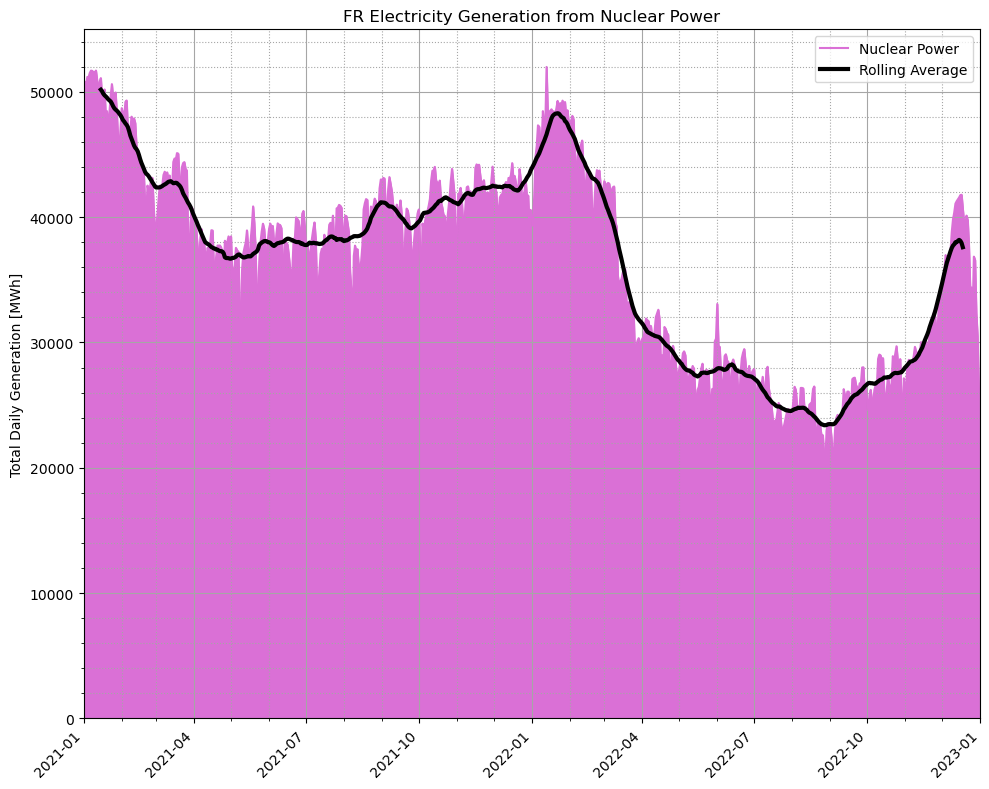

In [48]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title("FR Electricity Generation from Nuclear Power")
plt.ylabel('Total Daily Generation [MWh]')

ax.plot(FRGen["Date"], FRGen["Nuclear [MWh]"], color="orchid", label="Nuclear Power")
#ax.plot(FRGen["Date"], FRGen["PSH [MWh]"], label="PSH")
#ax.plot(FRGen["Date"], FRGen["Hydro [MWh]"], label="PSH")
ax.plot(FRGen["Date"], FRGen["Nuclear [MWh]"].rolling(28,  center=True).mean(), linewidth = 3, color = "black", label="Rolling Average")
#ax.plot(ImportData["Date"], Mean, label="RMS", color='black')


plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_xlim())

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.ylim(0,55000)
plt.tight_layout()

plt.fill_between(FRGen["Date"], FRGen["Nuclear [MWh]"], color="orchid")

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()